In [3]:
!pip -q install lxml

In [2]:
# Version 67
# From https://ungoogled-software.github.io/ungoogled-chromium-binaries/releases/linux_portable/64bit/
!wget -q https://github.com/Eloston/ungoogled-chromium-binaries/releases/download/67.0.3396.87-2/ungoogled-chromium_67.0.3396.87-2_linux.tar.xz
!tar -xf ungoogled-chromium_67.0.3396.87-2_linux.tar.xz

# From https://chromedriver.storage.googleapis.com/index.html
!wget -q https://chromedriver.storage.googleapis.com/2.41/chromedriver_linux64.zip
!unzip -o chromedriver_linux64.zip -d ./ungoogled-chromium_67.0.3396.87-1_linux

Archive:  chromedriver_linux64.zip
  inflating: ./ungoogled-chromium_67.0.3396.87-1_linux/chromedriver  


In [4]:
import requests

def transcript(id='c-7YqBrtuNQ'):
    resp = requests.get(f'https://hierogly.ph/api/transcribe?v={id}',headers={'User-Agent':'Mozilla/5.0'})
    return resp.json()['text']

#transcript('GZ7xHi8AIjM')

In [30]:
from selenium import webdriver
import os
from lxml import etree
import pandas as pd
import numpy as np
'''
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--incognito')
chrome_options.add_argument('log-level=3')
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")
chrome_driver = os.getcwd() +"/ungoogled-chromium_67.0.3396.87-1_linux/chromedriver"
chrome_options.add_argument("--width=2560")
chrome_options.add_argument("--height=1440")
browser = webdriver.Chrome(options=chrome_options, executable_path=chrome_driver)
'''

'\nchrome_options = webdriver.ChromeOptions()\nchrome_options.add_argument(\'--headless\')\nchrome_options.add_argument(\'--disable-gpu\')\nchrome_options.add_argument(\'--incognito\')\nchrome_options.add_argument(\'log-level=3\')\nchrome_options.add_argument("--disable-dev-shm-usage")\nchrome_options.add_argument("--no-sandbox")\nchrome_driver = os.getcwd() +"/ungoogled-chromium_67.0.3396.87-1_linux/chromedriver"\nchrome_options.add_argument("--width=2560")\nchrome_options.add_argument("--height=1440")\nbrowser = webdriver.Chrome(options=chrome_options, executable_path=chrome_driver)\n'

In [45]:
class youtube(object):
    driver = None

    def __init__(self):
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--disable-gpu')
        chrome_options.add_argument('--incognito')
        chrome_options.add_argument('log-level=3')
        chrome_options.add_argument("--disable-dev-shm-usage")
        chrome_options.add_argument("--no-sandbox")
        chrome_driver = os.getcwd() +"/ungoogled-chromium_67.0.3396.87-1_linux/chromedriver"
        self.driver = webdriver.Chrome(options=chrome_options, executable_path=chrome_driver)
        self.driver.set_window_position(0, 0)
        self.driver.set_window_size(1968, 1000)
        
    def go(self, id):
        self.driver.get(f'https://www.youtube.com/watch?v={id}')
        return len(self.getsource())
    
    def getsource(self):
        return self.driver.page_source
    
    def getscreenshot(self):
        self.driver.save_screenshot('test.png')
        return None
  
    def getrecommend(self):
        html = etree.HTML(self.driver.page_source)
        id = [str.split(x.attrib['href'],'=')[1] for x in html.findall(".//a[@id='thumbnail']") if ('href' in x.attrib.keys())]
        title = [x.attrib['title'] for x in html.findall(".//span[@id='video-title']")]
        channel = [x.text for x in html.findall(".//div[@id='metadata']/div/ytd-channel-name/div/div/yt-formatted-string")]
        result = pd.DataFrame(zip(id,title,channel),columns=['ID','TITLE','CHANNEL'])
        return result

In [46]:
yt = youtube()

In [47]:
yt.go('MKdZ1qi5-qY')

1303360

In [48]:
yt.getscreenshot()

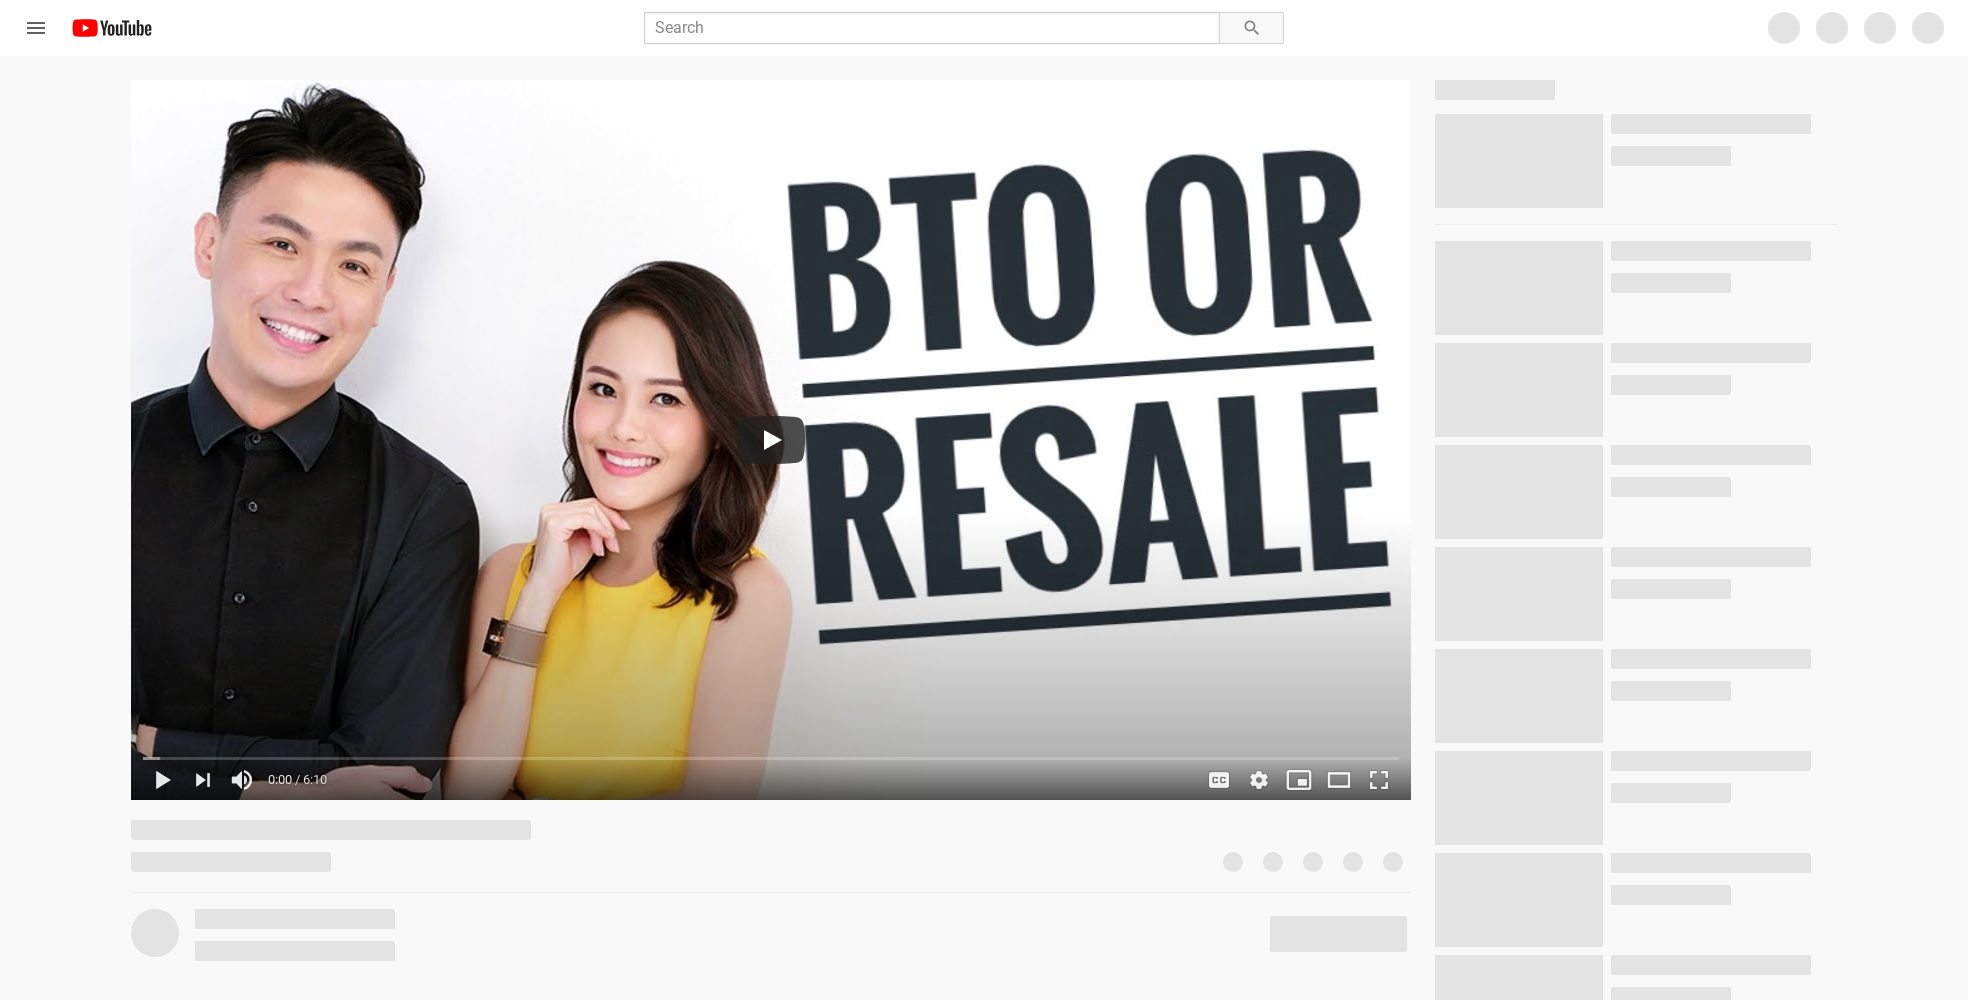

In [49]:
from IPython.display import Image, HTML
Image('test.png')

In [50]:
yt.getrecommend()

,ID,TITLE,CHANNEL
0,HLJx5GrYVO8,3 Pros and Cons of Executive Condominiums [You...,Marcus Luah PropNex
1,VwQa3DEC7s0,BTO vs Resale vs EC - Which is the best?,Geraint Liu
2,REd1Lo1JPmY,Number #1 Financial Mistake To Avoid Buying A ...,PropertyMadeSimple
3,bwwYoIFx7Co,CNA | Talking Point | E04: What's driving up t...,CNA
4,0u5vI379yzI,HDB MOP Over? DO THIS!!,Eric Chiew
5,NsACp1VdYD4,13 hidden costs when Buying or Selling HDB Fla...,HeroHomes
6,6tFMInv1bug,PROPERTY BUYER BIGGEST MISTAKE when comparing ...,Aaron Lin
7,xRZpCGvS3cg,home q&a part 1 | did we bto? why did we choos...,hillary ariel
8,TSFzi85AWBE,House Tour | How To Save Money When Buying HDB,Kelvin Learns Investing
9,bVKwRsCTaik,Saving agent fee? DIY PROPERTY BUYER? - ASK AA...,Aaron Lin


In [23]:
html = etree.HTML(yt.getsource())

In [24]:
## Get the IDs from all the anchors
[str.split(x.attrib['href'],'=')[1] for x in html.findall(".//a[@id='thumbnail']") if ('href' in x.attrib.keys())]

['HLJx5GrYVO8',
 'VwQa3DEC7s0',
 'ZNEfBhzIPWw',
 '6tFMInv1bug',
 'REd1Lo1JPmY',
 'ZXSg4brQTmk',
 'ZX43A3a10tk',
 'l7vylNf8JsM',
 'UuSg8S5gGNI',
 'TSFzi85AWBE',
 'cYtSEj1v0ew',
 'bh103mhW1FQ',
 'qiOCBxKxatc',
 'qR18_OD0pk0',
 'ZD8wIRE4hcU',
 '-Hn4wGYqF9M',
 'bOOXmfkXpkM',
 'xRZpCGvS3cg',
 'tsj_QrSrviA',
 'kVhsm38NT0Q']

In [28]:
# Recommended Video Channels
[x.text for x in html.findall(".//div[@id='metadata']/div/ytd-channel-name/div/div/yt-formatted-string")]

['Marcus Luah PropNex',
 'Geraint Liu',
 'DollarsAndSense.Sg',
 'Aaron Lin',
 'PropertyMadeSimple',
 'Invest With Stanley',
 'Josh Tan - TheAstuteParent',
 'Josh Tan - TheAstuteParent',
 'PropertyLimBrothers',
 'Kelvin Learns Investing',
 'TheSmartLocalSG',
 'ThePropGuide',
 'The Property Runway',
 'HeroHomes',
 'watermelon',
 'PropertyLimBrothers',
 'Bushradical',
 'hillary ariel',
 'PropertyGuru Group',
 'Aaron Lin']

In [26]:
# Recommended Video IDs
[str.split(x.attrib['href'],'=')[1] for x in html.findall(".//span[@id='video-title']/../..")]

['HLJx5GrYVO8',
 'VwQa3DEC7s0',
 'ZNEfBhzIPWw',
 '6tFMInv1bug',
 'REd1Lo1JPmY',
 'ZXSg4brQTmk',
 'ZX43A3a10tk',
 'l7vylNf8JsM',
 'UuSg8S5gGNI',
 'TSFzi85AWBE',
 'cYtSEj1v0ew',
 'bh103mhW1FQ',
 'qiOCBxKxatc',
 'qR18_OD0pk0',
 'ZD8wIRE4hcU',
 '-Hn4wGYqF9M',
 'bOOXmfkXpkM',
 'xRZpCGvS3cg',
 'tsj_QrSrviA',
 'kVhsm38NT0Q']

In [27]:
# Recommended Video Titles
[x.attrib['title'] for x in html.findall(".//span[@id='video-title']")]

['3 Pros and Cons of Executive Condominiums [You must know before considering to buy]',
 'BTO vs Resale vs EC - Which is the best?',
 'How Much Do Singaporean Couples Really Know About HDB Resale Flats?',
 'PROPERTY BUYER BIGGEST MISTAKE when comparing BTO vs RESALE - Mindset Problem - Singapore Property',
 'Number #1 Financial Mistake To Avoid Buying A Condo',
 'Top 5 Mistakes Made By Investors',
 'Ultimate Guide To Buying First Property Now In Singapore! HDB or Condo?',
 'HOW YOU CAN UPGRADE YOUR HDB FAST 💥 (Strategies For Couples buying BTO & Families Who Have Bought!)',
 'Buying A New Launch Property VS Resale Private Property (In Singapore) | Investors Ep 1',
 'House Tour | How To Save Money When Buying HDB',
 'TheSmartLocal BTO crash course',
 'How to Buy a HDB Resale Flat in Singapore - 2020 (For First-Timers!)',
 'How to Choose a BTO Property?',
 "New Launch VS Resale Condo: Understanding The 'First Mover Advantage' Principle Before Buying a Home",
 'Being A Lawyer in Singapore

In [39]:
id = [str.split(x.attrib['href'],'=')[1] for x in html.findall(".//a[@id='thumbnail']") if ('href' in x.attrib.keys())]
title = [x.attrib['title'] for x in html.findall(".//span[@id='video-title']")]
channel = [x.text for x in html.findall(".//div[@id='metadata']/div/ytd-channel-name/div/div/yt-formatted-string")]
pd.DataFrame(zip(id,title,channel),columns=['ID','TITLE','CHANNEL'])

,ID,TITLE,CHANNEL
0,HLJx5GrYVO8,3 Pros and Cons of Executive Condominiums [You...,Marcus Luah PropNex
1,VwQa3DEC7s0,BTO vs Resale vs EC - Which is the best?,Geraint Liu
2,ZNEfBhzIPWw,How Much Do Singaporean Couples Really Know Ab...,DollarsAndSense.Sg
3,6tFMInv1bug,PROPERTY BUYER BIGGEST MISTAKE when comparing ...,Aaron Lin
4,REd1Lo1JPmY,Number #1 Financial Mistake To Avoid Buying A ...,PropertyMadeSimple
5,ZXSg4brQTmk,Top 5 Mistakes Made By Investors,Invest With Stanley
6,ZX43A3a10tk,Ultimate Guide To Buying First Property Now In...,Josh Tan - TheAstuteParent
7,l7vylNf8JsM,HOW YOU CAN UPGRADE YOUR HDB FAST 💥 (Strategie...,Josh Tan - TheAstuteParent
8,UuSg8S5gGNI,Buying A New Launch Property VS Resale Private...,PropertyLimBrothers
9,TSFzi85AWBE,House Tour | How To Save Money When Buying HDB,Kelvin Learns Investing


In [37]:
transcript('cYtSEj1v0ew')

"This is John and Jill. They are about to get married and start a family, but first they have to plan for their future and it's not buying the perfect home. Both John and Jill are working polygraph and the earn a combined monthly salary of $ 4,000. Ideally, they would like to live near their parents in the ground, so many options is easy to get confused now. Do you know what options you have, how welcome number option? 1, a 3-bedroom easy in some balance, a 3-bedroom easy and the balance will cost you about. Seven hundred ninety thousand dollars there's a monthly household income of four thousand dollars. You will be able to take a bank loan of up to two hundred and twenty thousand dollars. Next, let's start by it, you can receive a CPF housing grant releases of up to $ 30,000. This review is four hundred ninety thousand dollars, which has to be paid up front and and resupply suspend for thirty. Nine thousand five hundred dollars has to be paid cash, while the rest can be covered by CP

In [139]:
transcript('rb_adz0tkOw')

"Both of us, we plant a lot of strawberries la on each other's lands. What * screams * Hi, I'm Bolin, I'm Qing, I'm Peps Hi, I'm Leah, and this is Zula ChickChats. Okay, hi guys welcome to today's episode of ChickChats. Why Are you all very nervous? Yes, this is my first time on ChickChats Welcome And today's episode we'll be talking about being in the grey area as much requested from the comments section below. Ah So we hear you okay, we will do this episode for you guys. So my first question to you guys, then, is what happened. Okay, whoever wants can share first la What happened. Bolin, Let's start with Bolin. No Qing should start because she's the new person. Why me? Oh my god? Yes, What happened. I met the person through an app Okay, So we hit off like we talk, then after that move to Telegram. But the thing right we went out for so many times right. The places we go to right were like-, not the kind of place that you and your friends would go to. For example, For example, I need 

In [122]:
transcript('5L31Wbrg7tE')

"On one of the days um, we were supposed to have a date .... He came to my house like downstairs. Then I no time to draw eyebrows no time to draw anything right. Then we [ sat ] at the lamp post. There [, I made ] sure to choose the dimmest lamppost Hi. I ’ m Julian Hi. I ’ m Amanda Hi. I ’ m John Hi. I ’ m Leah and this is Zula ChickChats Hi guys welcome to today. ’ s, episode of Zula ChickChats And today we ’ re gon na be talking about- the honeymoon phase in relationships. We have 3 people over here to share uh- their honeymoon phases in their relationships. So…. The first Can you: why Can you explain what the honeymoon phase is I ...? What do you mean You don, ’ t know I ’ m married. I forgot about it. It ’ s been a long time ago. Okay, so the honeymoon phase, I guess, would be the period before your relationship starts getting serious, All the butterflies, all the romantic gestures, Oh ..., For the first question: maybe we ’ ll, let the audience know for you guys. How long have yo

In [140]:
transcript('cYtSEj1v0ew')

"This is John and Jill. They are about to get married and start a family, but first they have to plan for their future and it's not buying the perfect home. Both John and Jill are working polygraph and the earn a combined monthly salary of $ 4,000. Ideally, they would like to live near their parents in the ground, so many options is easy to get confused now. Do you know what options you have, how welcome number option? 1, a 3-bedroom easy in some balance, a 3-bedroom easy and the balance will cost you about. Seven hundred ninety thousand dollars there's a monthly household income of four thousand dollars. You will be able to take a bank loan of up to two hundred and twenty thousand dollars. Next, let's start by it, you can receive a CPF housing grant releases of up to $ 30,000. This review is four hundred ninety thousand dollars, which has to be paid up front and and resupply suspend for thirty. Nine thousand five hundred dollars has to be paid cash, while the rest can be covered by CP

In [145]:
transcript('mPHGGxZwICI')

"My name is I've been working for about two years. My name is Rob. I'Ve been working for about two years, six years, plus I think five years plus I'm very sure, let's see God my location off just nice kata-kata and they realize okay might as well. We just did I just graduated. Yes, I think two years ago yeah - and I guess it just seemed like a natural information from that February. For the column, one poet a key numbers, a thousand by hello, I'm Hansel - I just graduated from in yet last year, and now I'm doing an internship of jewelry come and your student, your tree, we have been together what six? Yes, I think with us always day. Video, what does the you need to be married before you can apply for the blueblack all controller? I mean you're gon na collect the key. Oh boss, you don't need to be married, like yeah, you can apply first, then you get true or false. It is possible to play pain, zero cash yeah. You can actually go share without paying any cash. It wasn't actually, when w